In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# This section is BASICS OF VISUALIZATION and PRE PREPROCESSING

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/DEBOUR.XLS',sheet_name='Sheet2')

In [ ]:
data.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


<Axes: xlabel='Years', ylabel='Sales'>

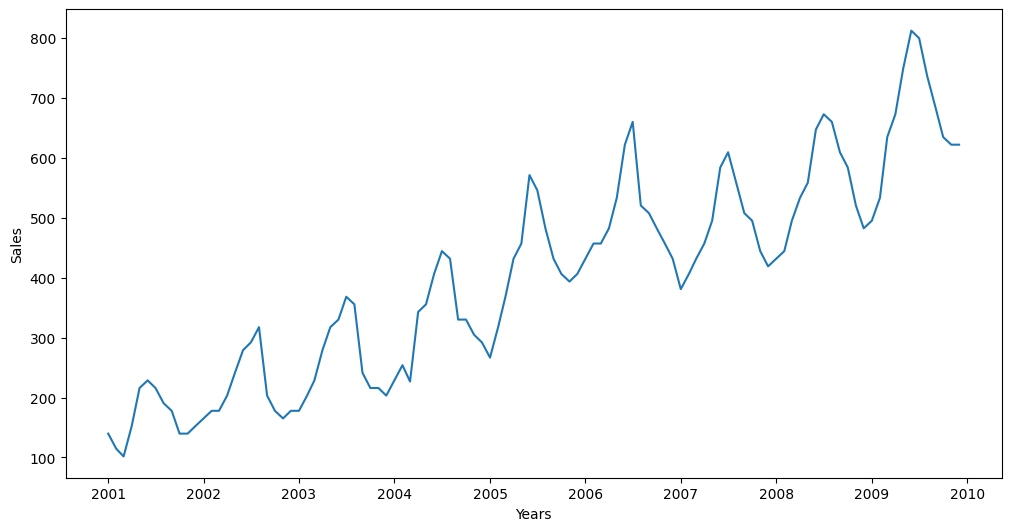

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
sns.lineplot(x='Years', y='Sales', data=data)

In [ ]:
df1= data.set_index('Years')

In [ ]:
df1

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9
...,...
2009-08-01,736.6
2009-09-01,685.5
2009-10-01,635.0


<Axes: xlabel='Years'>

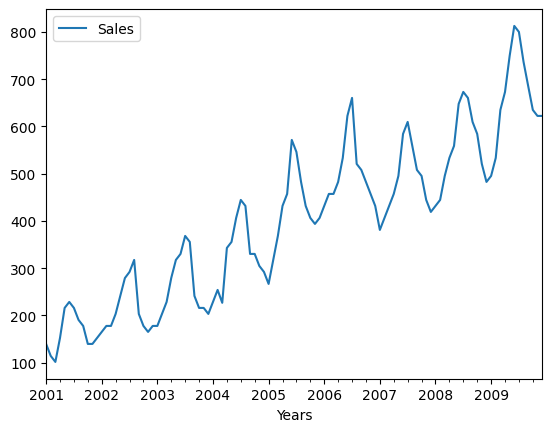

In [ ]:
df1.plot(kind='line')

In [ ]:
data['Years'].dt.quarter

0      1
1      1
2      1
3      2
4      2
      ..
103    3
104    3
105    4
106    4
107    4
Name: Years, Length: 108, dtype: int32

In [ ]:
data['year'] = data['Years'].dt.year
data['quarter'] = data['Years'].dt.quarter

In [ ]:
data.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


<Axes: xlabel='Years', ylabel='Sales'>

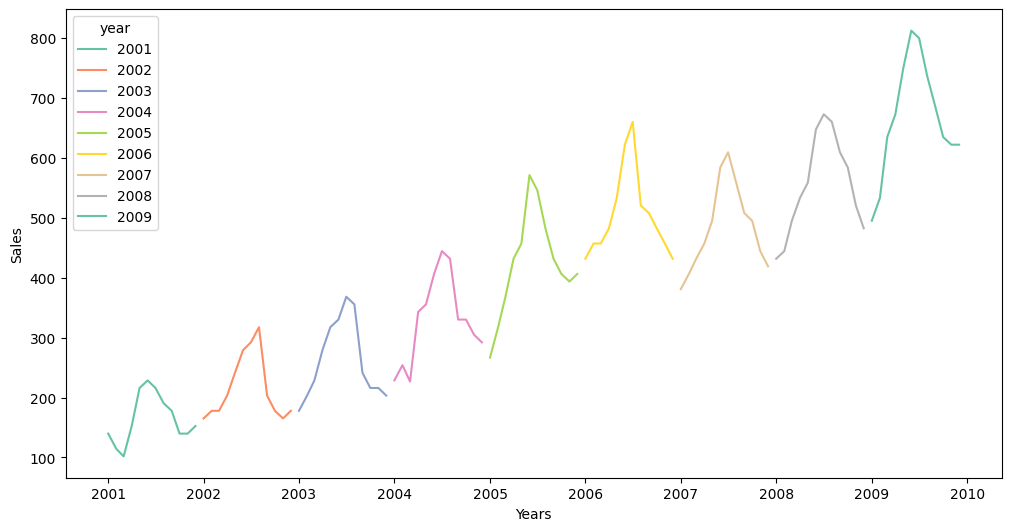

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
sns.lineplot(x='Years', y='Sales', data=data, hue='year',palette='Set2')

<Axes: xlabel='Years'>

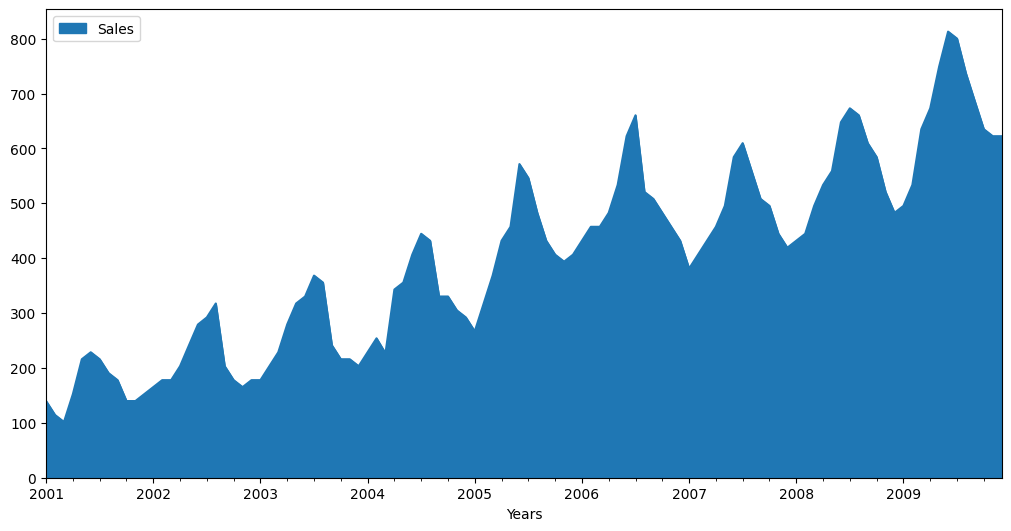

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df1.plot(kind='area',ax=ax)


In [ ]:
df_bar = data[['Sales','year']].groupby('year').sum().reset_index()
df_bar

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


<Axes: xlabel='year'>

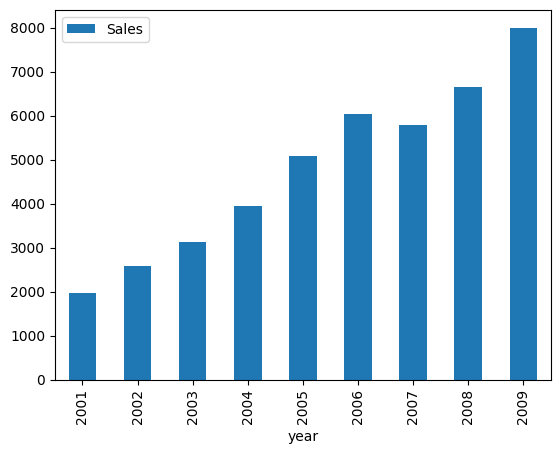

In [ ]:
df_bar.plot(kind='bar',x='year',y='Sales')

<ipython-input-54-a7bc1c3ab65e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='year', y='Sales', data=df_bar,kind='bar',aspect=3,palette='Set2')


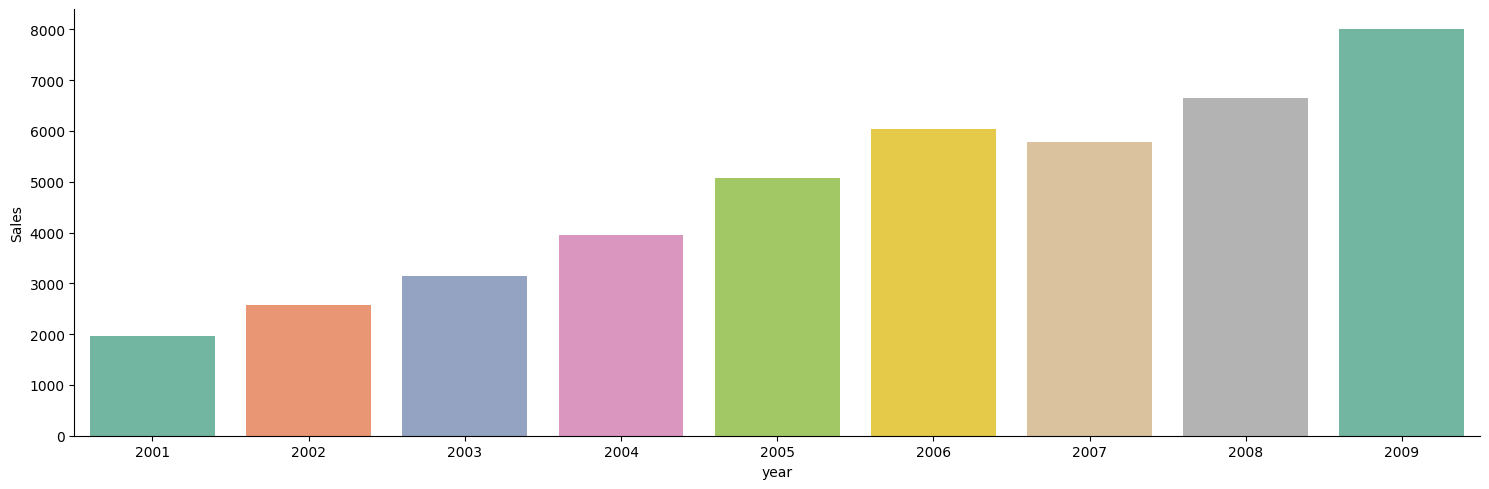

In [ ]:
sns.catplot(x='year', y='Sales', data=df_bar,kind='bar',aspect=3,palette='Set2')

In [ ]:
df_year_q = data[['Sales','year','quarter']].groupby(by=['year','quarter']).sum()

In [ ]:
raw_data = df_year_q.values

In [ ]:
raw_data = raw_data.reshape(9,4)

In [ ]:
df_year_q = pd.DataFrame(raw_data, index=list(range(2001,2010)), columns=['Q1','Q2','Q3','Q4'])

In [ ]:
df_year_q

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


<Axes: >

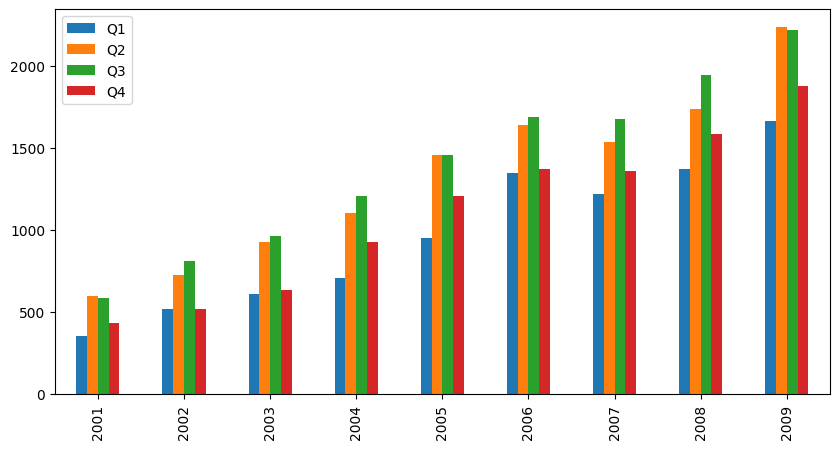

In [ ]:
df_year_q.plot(kind='bar',figsize=(10,5))

<Axes: >

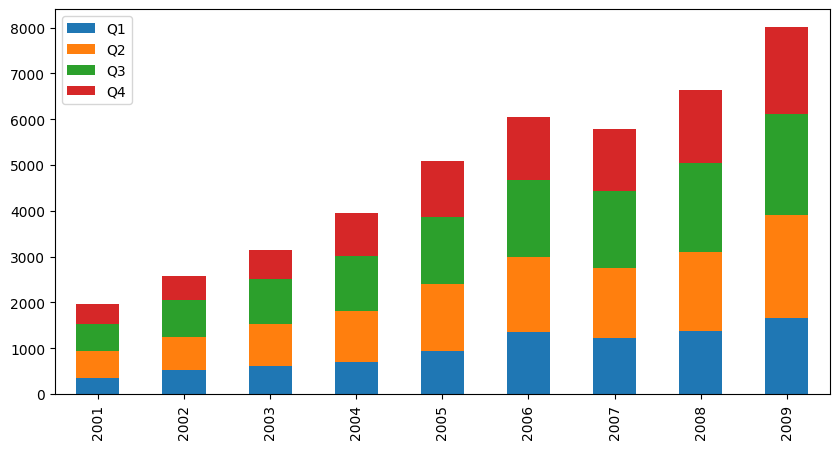

In [ ]:
df_year_q.plot(kind='bar',figsize=(10,5), stacked=True)

<Axes: >

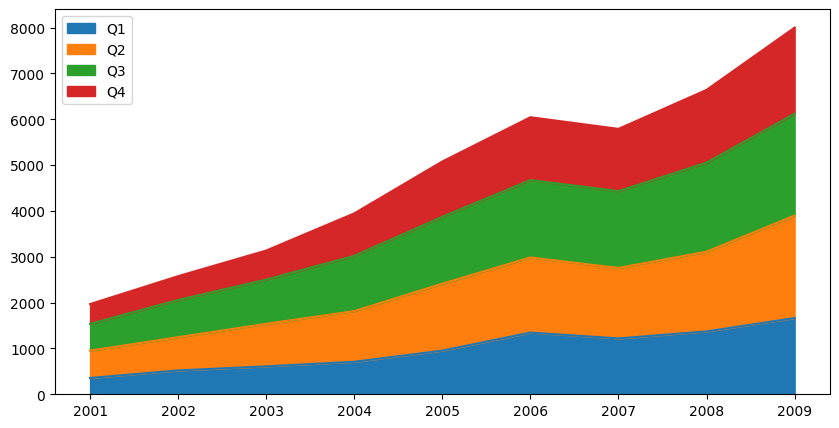

In [ ]:
df_year_q.plot(kind='area',figsize=(10,5), stacked='True')

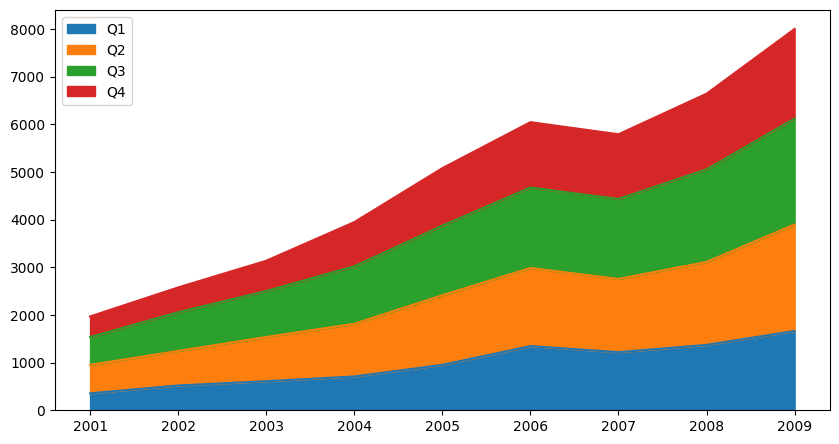

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2))
df_year_q.plot(kind='area', ax=ax, stacked='False')
plt.show()

<Axes: >

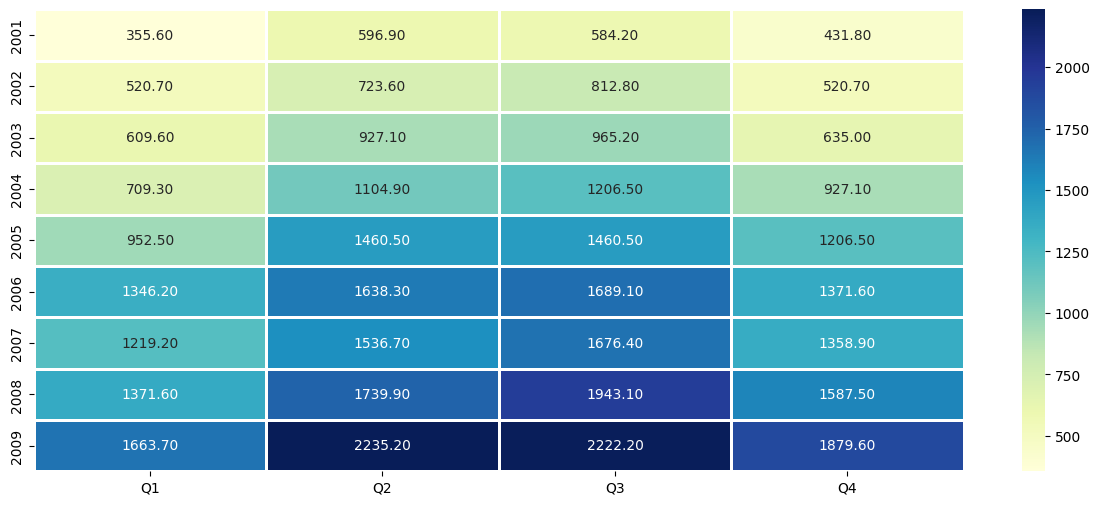

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_year_q,annot=True,cmap='YlGnBu',fmt='.2f',linewidths=1)

# This section is LINEAR REGRESSION

In [ ]:
df_lr = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/REGRES.XLS')
df_lr.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [ ]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [ ]:
df_lr.mean(), df_lr.median(), df_lr.mode()

(x    2.236667
 y    6.070000
 dtype: float64,
 x    2.18
 y    3.20
 dtype: float64,
       x    y
 0  1.85  1.7
 1  2.18  2.4)

In [ ]:
df_lr.var(), df_lr.std()

(x     0.714815
 y    24.310415
 dtype: float64,
 x    0.845468
 y    4.930559
 dtype: float64)

In [ ]:
df_lr.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


<ipython-input-125-315b4ad860b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lr['x'])


<Axes: xlabel='x', ylabel='Density'>

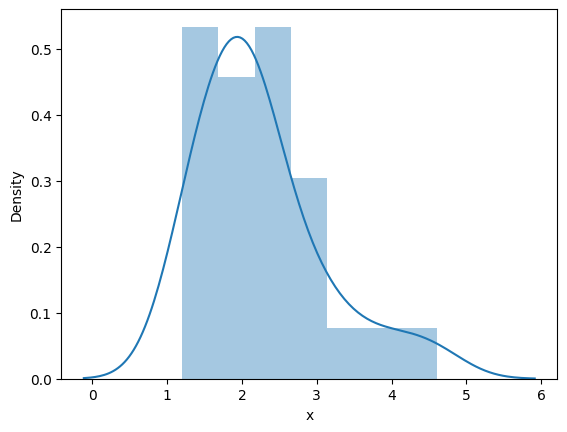

In [ ]:
sns.distplot(df_lr['x'])

<ipython-input-126-5cf23de5cfd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lr['y'])


<Axes: xlabel='y', ylabel='Density'>

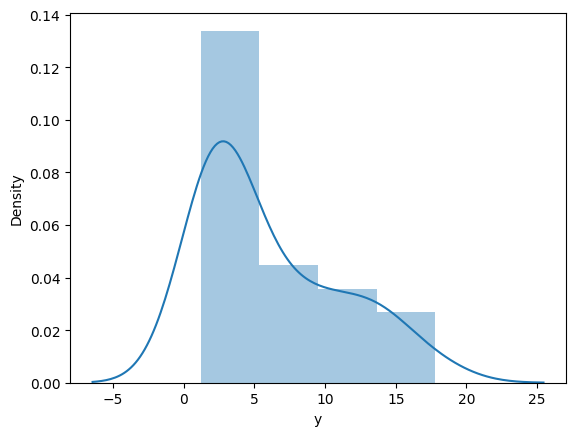

In [ ]:
sns.distplot(df_lr['y'])

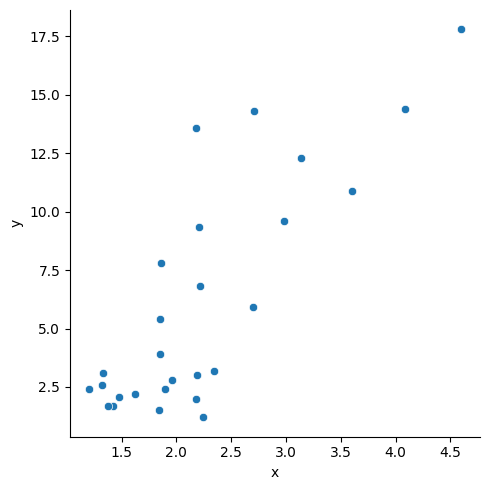

In [ ]:
sns.relplot(x='x',y='y',data=df_lr)

<Axes: >

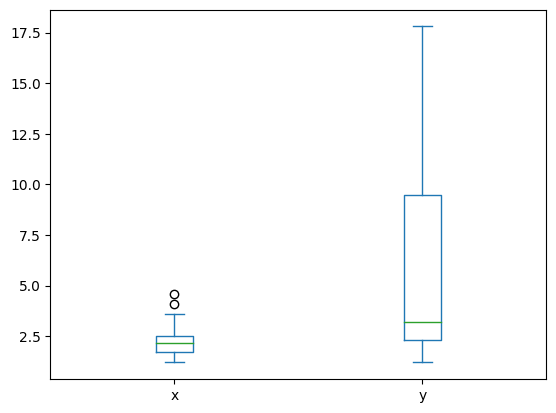

In [ ]:
df_lr.plot(kind='box')

In [ ]:
# slope of line cov(x,y)/var(x)
df_lr.cov()

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [ ]:
df_lr.var()

x     0.714815
y    24.310415
dtype: float64

In [ ]:
slope = df_lr['x'].cov(df_lr['y'])/df_lr['x'].var()
slope

4.743527107590986

In [ ]:
# intercept is mean(y) - slope*mean(x)
intercept = df_lr['y'].mean() - slope*df_lr['x'].mean()
intercept

-4.539688963978507

In [ ]:
def model_equation(x):
  return slope*x + intercept


In [ ]:
# y_pred = df_lr['x'].apply(model_equation)
y_pred = model_equation(df_lr['x'])
y_pred

0      2.196120
1      4.283271
2      2.480731
3     10.354986
4      5.943506
5      4.757624
6      1.152544
7      4.473013
8     14.861337
9      9.596022
10     5.848635
11     4.188401
12     5.801200
13     1.769202
14     5.801200
15     5.990941
16     6.085812
17     3.144825
18     1.721767
19     4.235836
20     4.235836
21     8.267834
22    12.537009
23    17.280536
24     2.006378
25     6.560164
26     8.315269
Name: x, dtype: float64

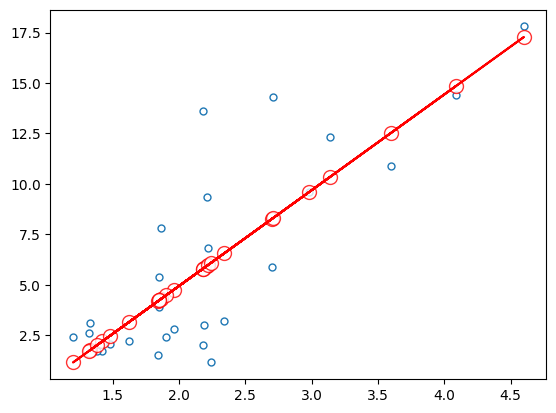

In [ ]:
plt.plot(df_lr['x'],df_lr['y'],'o',markersize=5, markerfacecolor='w')
plt.plot(df_lr['x'],y_pred,'ro', markersize=10, markerfacecolor='w',alpha=0.8)
plt.plot(df_lr['x'],y_pred,'r')


In [ ]:
 # by using sklearn
from sklearn.linear_model import LinearRegression
X = df_lr.iloc[:,:-1].values
y = df_lr.iloc[:,-1].values
X.shape, y.shape

((27, 1), (27,))

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_ , model.coef_

(-4.539688963978512, array([4.74352711]))

In [ ]:
y_pred = model.predict(X)
y_pred

array([ 2.19611953,  4.28327146,  2.48073116, 10.35498615,  5.94350594,
        4.75762417,  1.15254357,  4.47301254, 14.86133691,  9.59602182,
        5.8486354 ,  4.18840091,  5.80120013,  1.76920209,  5.80120013,
        5.99094121,  6.08581176,  3.14482495,  1.72176682,  4.23583619,
        4.23583619,  8.26783423, 12.53700862, 17.28053573,  2.00637844,
        6.56016447,  8.3152695 ])

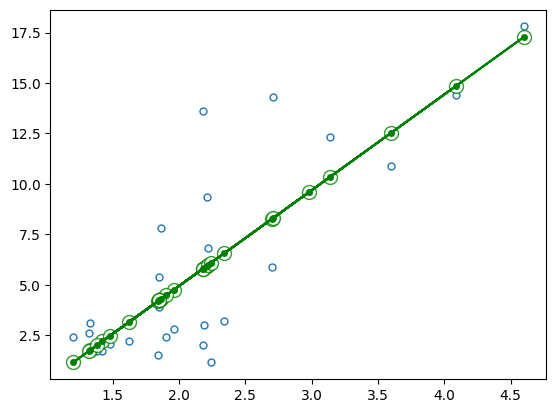

In [ ]:
plt.plot(df_lr['x'],df_lr['y'],'o',markersize=5, markerfacecolor='w')
plt.plot(df_lr['x'],y_pred,'go', markersize=10, markerfacecolor='w',alpha=0.8)
plt.plot(df_lr['x'],y_pred,'g')
plt.plot(df_lr['x'],y_pred,'go',markersize=4)

In [ ]:
# using stats model
import statsmodels.api as sm

In [ ]:
model = sm.OLS.from_formula('y~x',data=df_lr).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.50e-07
Time:                        09:45:41   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.0

In [ ]:
test = pd.DataFrame([[3]], columns=['x'])
model.predict(test)

0    9.690892
dtype: float64

In [ ]:
# evaluation
def sum_of_squares(y_value):
  return np.sum((y_value - np.mean(y_value))**2)

In [ ]:
sum_of_squares(df_lr['y'])

632.0708000000001

In [ ]:
sum_of_squares(model.fittedvalues)

418.18650368895675

In [ ]:
# error is upper value - lower value or
np.sum(np.square(df_lr['y'] - model.fittedvalues))

213.8842963110432

# This section is TIME SERIES

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/SALES_.CSV')
data.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data['Years']= pd.to_datetime(data['Years'])
data.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [ ]:
# np.array(range(1,73))
np.arange(1,73,1)
data['time'] = np.arange(1,73,1)
data.head()

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [ ]:
data['month']= data['Years'].dt.month_name()
data.head()

,Years,Sales,time,month
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [ ]:
# split for train and test
df_train = data.head(48)
df_test = data.loc[48:]

In [ ]:
x_train = df_train[['time']].values
y_train = df_train['Sales'].values
x_train.shape , y_train.shape

((48, 1), (48,))

In [ ]:
x_test = df_test[['time']].values
y_test = df_test['Sales'].values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_fitted = model.predict(x_train)

In [ ]:
y_forcasted = model.predict(x_test)

In [ ]:
error = y_train - y_fitted
se = error.std()
ME = 1.96*se    # margin of error

<ipython-input-17-6933d3690b6a>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test['Years'],y_forcasted, 'b', color='red')


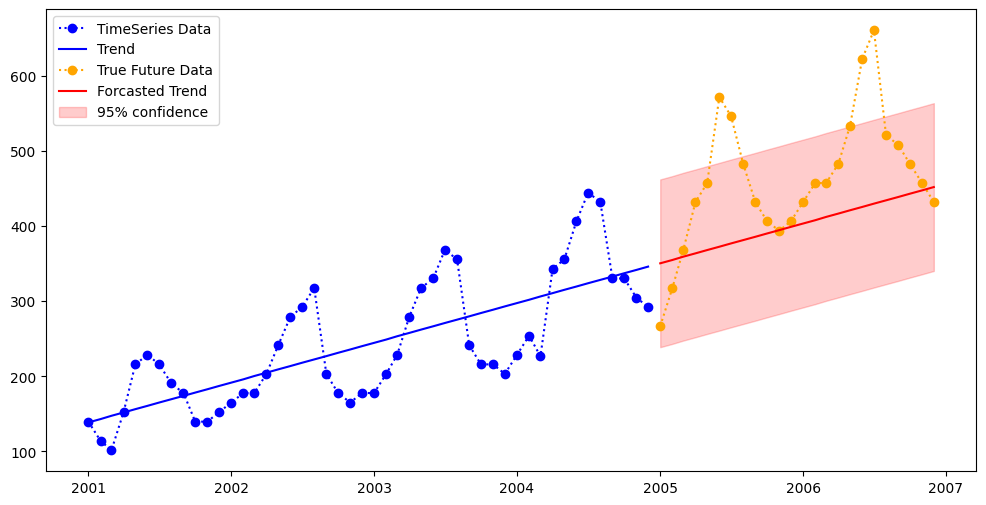

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df_train['Years'],y_train,'bo:')
plt.plot(df_train['Years'],y_fitted, 'b')


plt.plot(df_test['Years'],y_test,'o:', color='orange')
plt.plot(df_test['Years'],y_forcasted, 'b', color='red')

ci_plus = y_forcasted + ME
ci_minus = y_forcasted - ME

plt.fill_between(df_test['Years'], ci_plus, ci_minus, color='red', alpha=0.2)


plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forcasted Trend', '95% confidence'])
# plt.plot(x_train,y_fitted,'ro', markersize=10, markerfacecolor='w',alpha=0.8)

In [ ]:
# 	2006-06-01	622.3	66
pred = model.predict(np.array([[66]]))
print(pred)
print("range of pridiction", pred+ME, " ", pred-ME)


[425.33732089]
range of pridiction [536.94651705]   [313.72812472]


#This section is ADVANCED TIME SERIES

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/SALES_.CSV')
data.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [ ]:
data['Years']= pd.to_datetime(data['Years'])
data['time'] = np.arange(1,73,1)
data['month']= data['Years'].dt.month_name()
data.head()

,Years,Sales,time,month
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [ ]:
# split for train and test
df_train = data.head(48)
df_test = data.loc[48:]

In [ ]:
df_train.head()

,Years,Sales,time,month
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


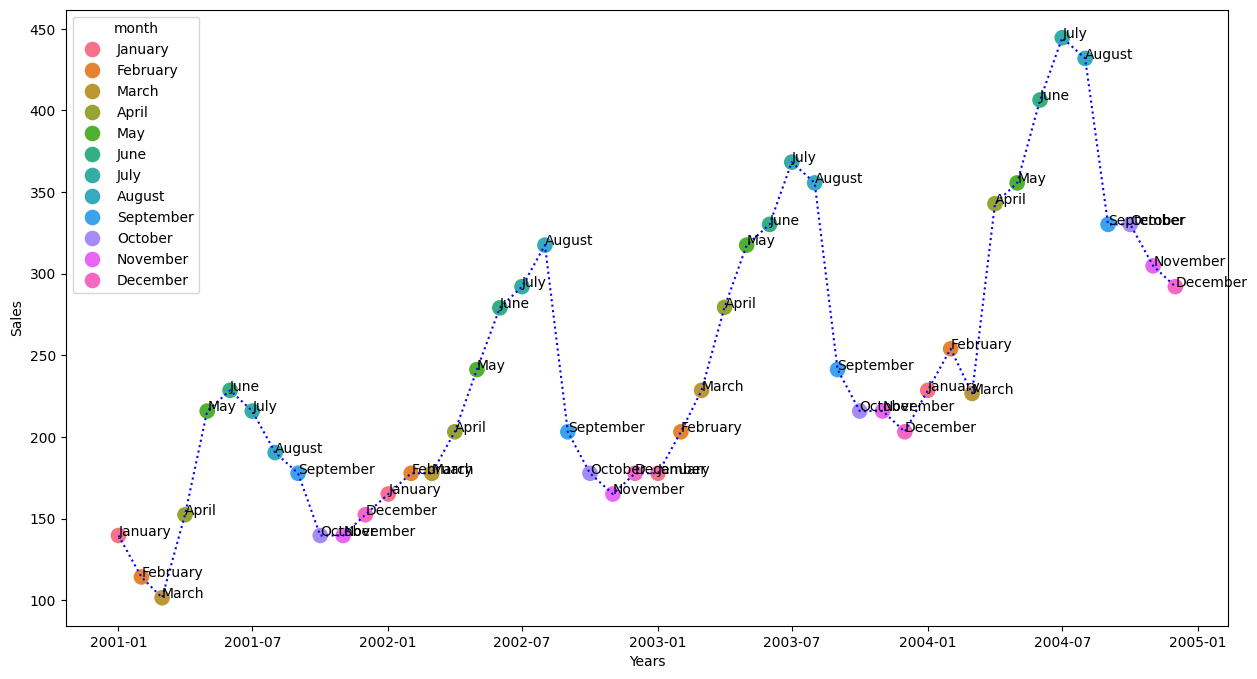

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
# plt.scatter(df_train['Years'],df_train['Sales'])
plt.plot(df_train['Years'],df_train['Sales'],'b:') #b--
sns.scatterplot(x=df_train['Years'], y=df_train['Sales'], s=150, hue=df_train['month'])

for i in range(len(df_train)):
  plt.text(df_train['Years'][i], df_train['Sales'][i], df_train['month'][i])

In [ ]:
dum = pd.get_dummies(df_train['month'],drop_first=True).astype(int)
dum.shape

(48, 11)

In [ ]:
# df_train['month']
df_train_new = pd.concat([df_train,dum],axis=1)
df_train_new.head()

,Years,Sales,time,month,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
dum = pd.get_dummies(df_test['month'],drop_first=True).astype(int)
df_test_new = pd.concat([df_test,dum],axis=1)
df_test_new.head()

,Years,Sales,time,month,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,February,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,March,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,April,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,May,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cols = ['time', 'August', 'December', 'February','January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
x_train_new = df_train_new[cols].values
y_train_new = df_train_new['Sales'].values
x_test_new = df_test_new[cols].values
y_test_new = df_test_new['Sales'].values

In [ ]:
x_train_new.shape , y_train_new.shape, x_test_new.shape, y_test_new.shape

((48, 12), (48,), (24, 12), (24,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_new,y_train_new)

LinearRegression()

In [ ]:
y_fitted = model.predict(x_train_new)
y_forcasted = model.predict(x_test_new)

In [ ]:
error = y_train_new - y_fitted
se = error.std()
ME = 1.96*se

<ipython-input-51-1f06a0d7355d>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test_new['Years'],y_forcasted, 'b', color='red')


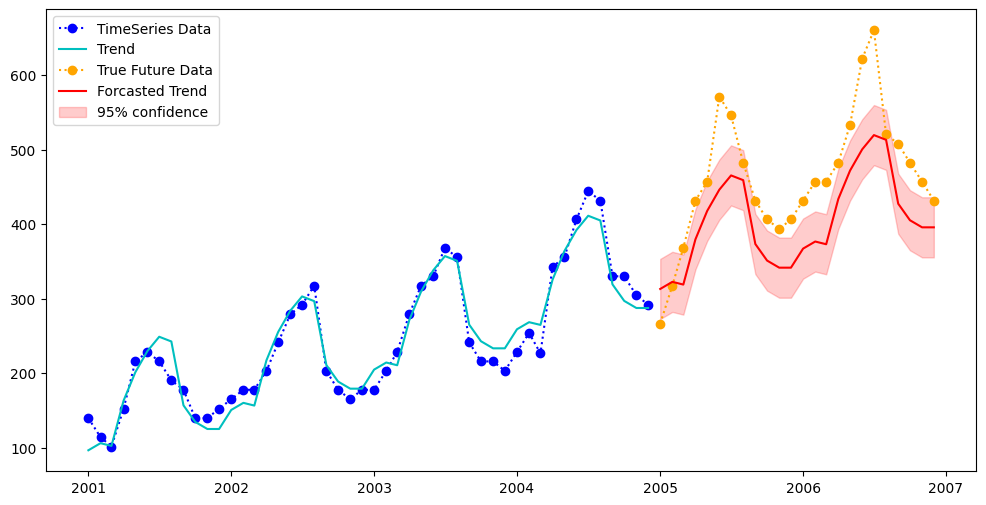

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df_train_new['Years'],y_train_new,'bo:')
plt.plot(df_train_new['Years'],y_fitted, 'c')


plt.plot(df_test_new['Years'],y_test_new,'o:', color='orange')
plt.plot(df_test_new['Years'],y_forcasted, 'b', color='red')

ci_plus = y_forcasted + ME
ci_minus = y_forcasted - ME

plt.fill_between(df_test_new['Years'], ci_plus, ci_minus, color='red', alpha=0.2)


plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forcasted Trend', '95% confidence'])

# This section is MULTIPLICATIVE MODEL


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/SALES_.CSV')
data['Years']= pd.to_datetime(data['Years'])
data['time'] = np.arange(1,73,1)
data['month']= data['Years'].dt.month_name()
data.head()

,Years,Sales,time,month
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [ ]:
# split for train and test
df_train = data.head(48)
df_test = data.loc[48:]

In [ ]:
X_t = df_train[['time']].values
y_t = df_train['Sales'].values

In [ ]:
X_t_test = df_test[['time']].values
y_t_test = df_test['Sales'].values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_t,y_t)

LinearRegression()

In [ ]:
y_fit = model.predict(X_t)
df_train['Predicted'] = y_fit
df_train['SI'] = df_train['Sales']/df_train['Predicted']
df_train.head()

<ipython-input-84-e14b1599f010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Predicted'] = y_fit
<ipython-input-84-e14b1599f010>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SI'] = df_train['Sales']/df_train['Predicted']


,Years,Sales,time,month,Predicted,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


In [ ]:
deviation_season = df_train[['month','SI']].groupby(by='month').mean().rename(columns={'SI':'correction_factor'})
deviation_season

,correction_factor
month,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


In [ ]:
df_train = pd.merge(df_train,deviation_season,on='month')
df_train.head()

,Years,Sales,time,month,Predicted,SI,correction_factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934


In [ ]:
df_train['fitted_values'] = df_train['Predicted']*df_train['correction_factor']
df_train.head()

,Years,Sales,time,month,Predicted,SI,correction_factor,fitted_values
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


In [ ]:
forcast = model.predict(X_t_test)
df_test['forcasted_trend'] = forcast
df_test.head()

<ipython-input-88-6de9ec1fd9a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcasted_trend'] = forcast


,Years,Sales,time,month,forcasted_trend
48,2005-01-01,266.7,49,January,350.363298
49,2005-02-01,317.5,50,February,354.773535
50,2005-03-01,368.3,51,March,359.183771
51,2005-04-01,431.8,52,April,363.594008
52,2005-05-01,457.2,53,May,368.004244


In [ ]:
df_test = pd.merge(df_test,deviation_season,on='month')
df_test.head()

,Years,Sales,time,month,forcasted_trend,correction_factor
0,2005-01-01,266.7,49,January,350.363298,0.841208
1,2006-01-01,431.8,61,January,403.286138,0.841208
2,2005-02-01,317.5,50,February,354.773535,0.840934
3,2006-02-01,457.2,62,February,407.696374,0.840934
4,2005-03-01,368.3,51,March,359.183771,0.804644


In [ ]:
df_test['forcasted_mul'] = df_test['forcasted_trend']*df_test['correction_factor']
df_test.head()

,Years,Sales,time,month,forcasted_trend,correction_factor,forcasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,January,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,February,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154


In [ ]:
error = df_train['Sales'] - df_train['fitted_values']
se = error.std()
ME = 1.96*se
ME

36.42544715050407

In [ ]:
df_train.sort_values(by='Years', inplace=True)
df_test.sort_values(by='Years', inplace=True)

<ipython-input-93-77c42e6f13ac>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test['Years'],df_test['forcasted_mul'], 'b', color='red')


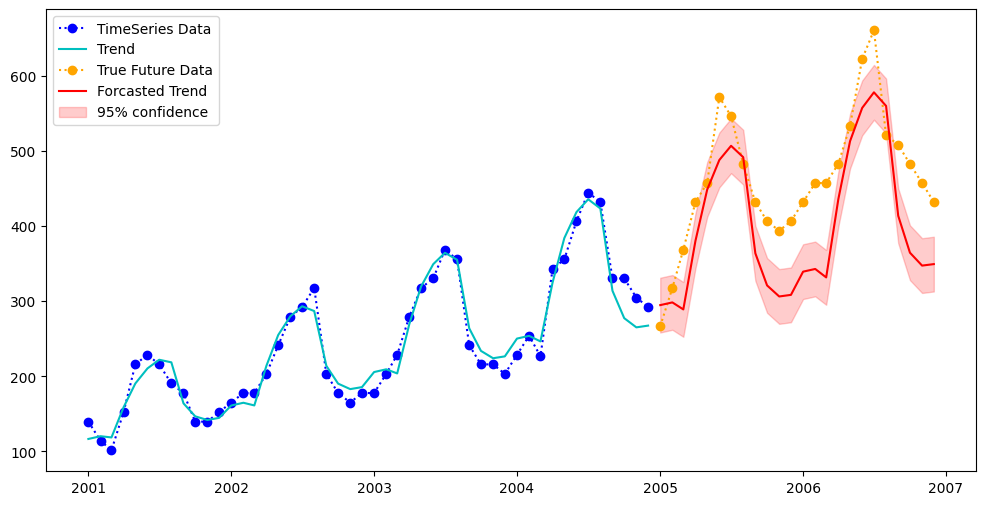

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df_train['Years'], df_train['Sales'],'bo:')
plt.plot(df_train['Years'], df_train['fitted_values'], 'c')


plt.plot(df_test['Years'],df_test['Sales'],'o:', color='orange')
plt.plot(df_test['Years'],df_test['forcasted_mul'], 'b', color='red')

ci_plus = df_test['forcasted_mul'] + ME
ci_minus = df_test['forcasted_mul'] - ME

plt.fill_between(df_test['Years'], ci_plus, ci_minus, color='red', alpha=0.2)


plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forcasted Trend', '95% confidence'])

# This section is AUTO REGRESSIVE

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/US_AIR.CSV')
data.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
data['month']= pd.to_datetime(data['month'])
data.dtypes

month         datetime64[ns]
passengers             int64
dtype: object

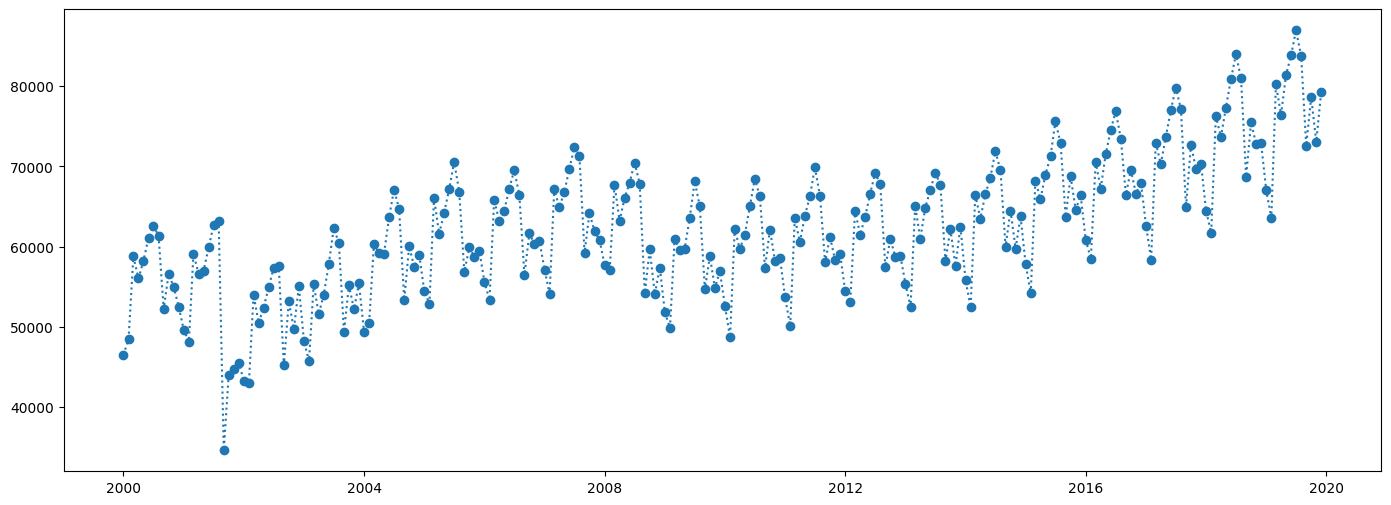

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))
# sns.lineplot(x='month',y='passengers',data=data)
plt.plot(data['month'],data['passengers'],'o:')

In [ ]:
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


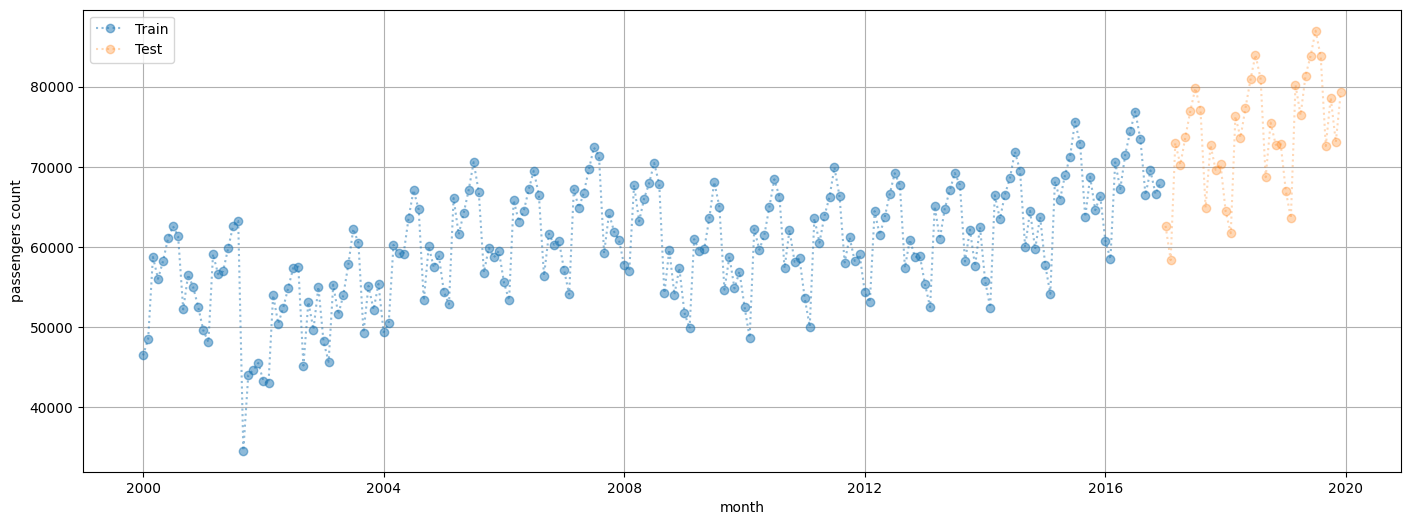

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)
plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test'])

In [ ]:
  # ACF and PACF analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

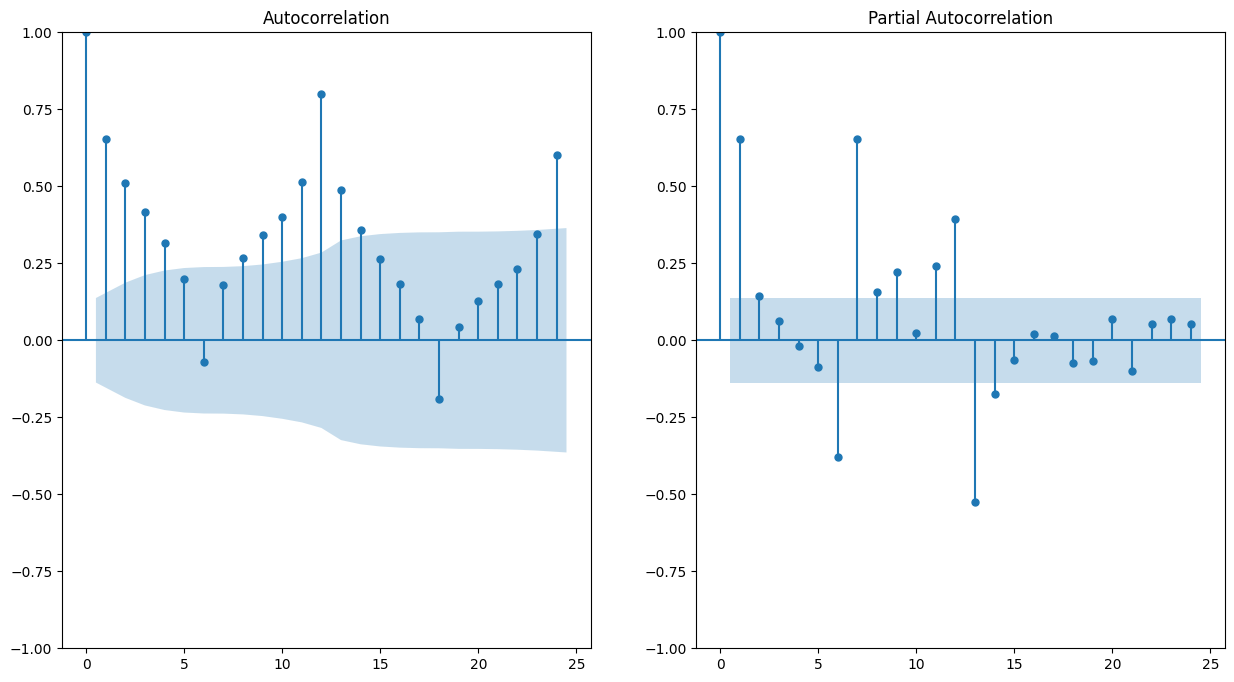

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
res1 = plot_acf(df_train['passengers'], ax=ax[0])
res2 = plot_pacf(df_train['passengers'], ax=ax[1])
# plt.show()

In [ ]:
#  make data staitonary
difference = df_train['passengers'].diff()
# df_test['passengers'] = df_test['passengers'].diff()
difference

0          NaN
1       2034.0
2      10238.0
3      -2731.0
4       2168.0
        ...   
199    -3436.0
200    -6973.0
201     3062.0
202    -2948.0
203     1392.0
Name: passengers, Length: 204, dtype: float64

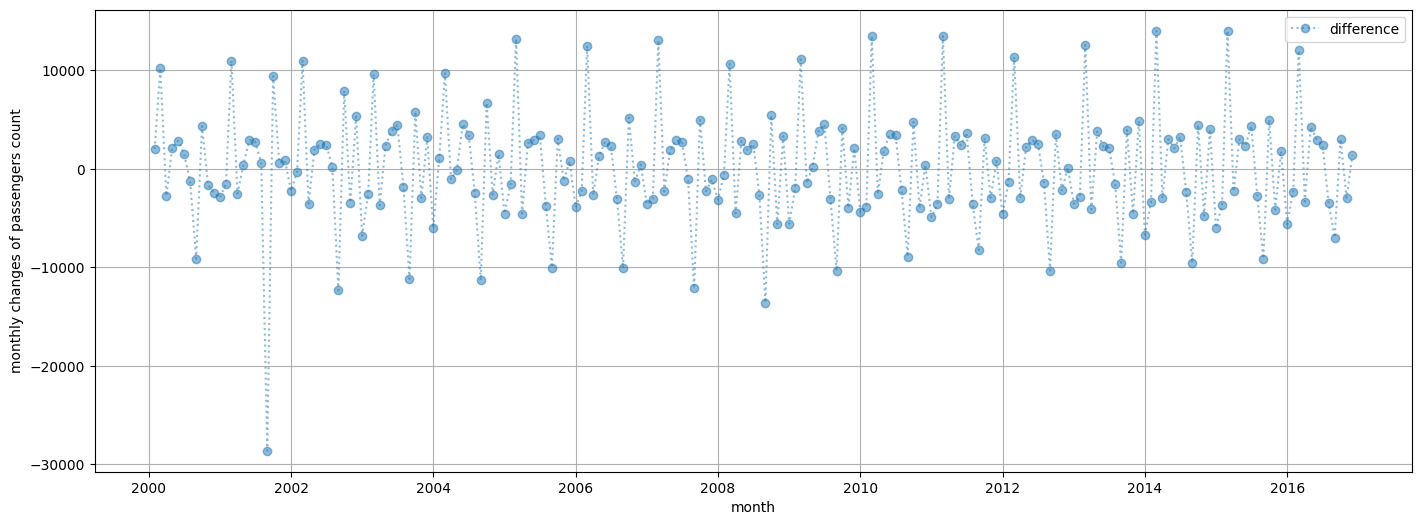

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.plot(df_train['month'],difference ,'o:',alpha=0.5)
plt.ylabel('monthly changes of passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['difference'])

In [ ]:
difference.dropna(inplace=True)

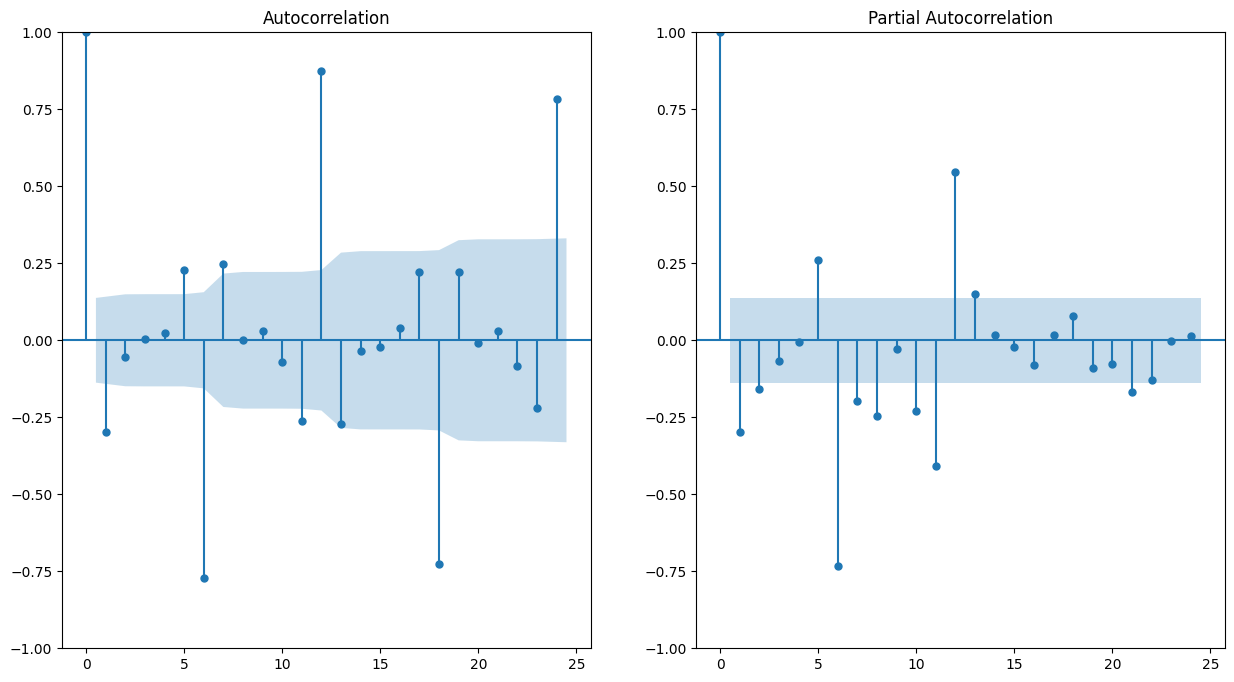

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
res1 = plot_acf(difference, ax=ax[0])
res2 = plot_pacf(difference, ax=ax[1])

In [ ]:
# for auto regressive model
# we need lags :: lags = p :: AR(p)
# found by ACF and PACF
# we found p =12 increase p for better result
x_train = df_train.set_index('month')
x_test = df_test.set_index('month')



In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(x_train,lags=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             passengers   No. Observations:                  204
Model:                    AutoReg(12)   Log Likelihood               -1791.208
Method:               Conditional MLE   S.D. of innovations           2725.128
Date:                Sat, 04 May 2024   AIC                           3610.416
Time:                        07:20:48   BIC                           3656.021
Sample:                    01-01-2001   HQIC                          3628.887
                         - 12-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1101.8877   2670.461     -0.413      0.680   -6335.894    4132.119
passengers.L1      0.4234      0.062      6.848      0.000       0.302       0.545
passengers.L2      0.0487      0.069

In [ ]:
fit_val = model.fittedvalues
fit_val.head()

month
2001-01-01    49334.710929
2001-02-01    49964.903006
2001-03-01    57480.606603
2001-04-01    55642.948449
2001-05-01    57963.182409
dtype: float64

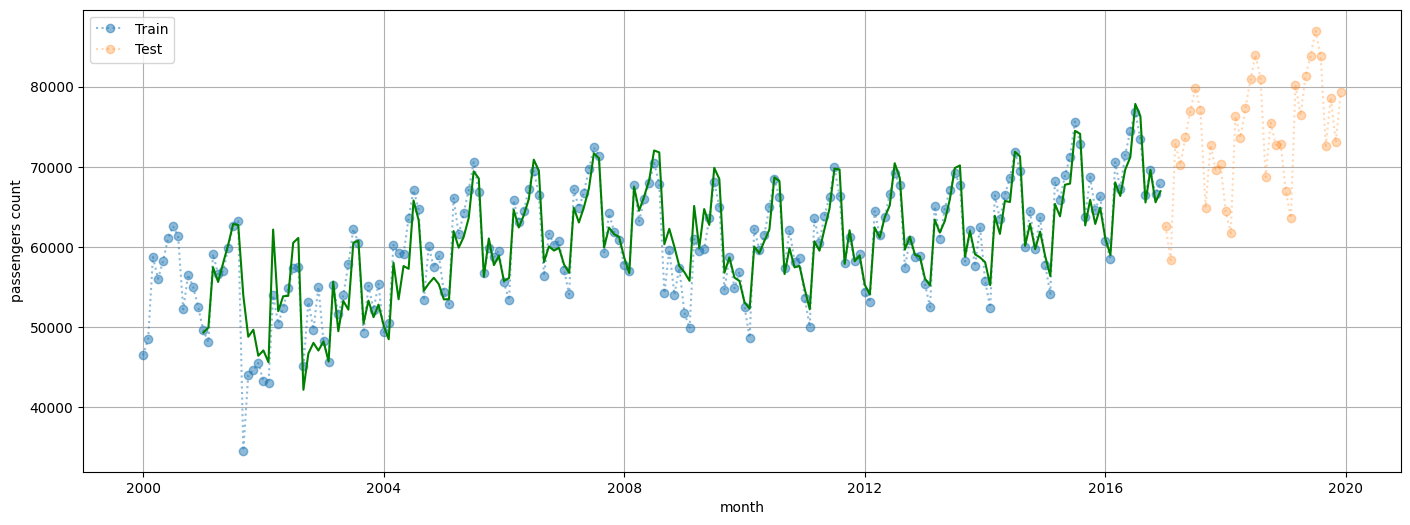

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)

plt.plot(fit_val.index,fit_val,'g-')


plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test', 'AR(12)'])

In [ ]:
start = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
end = datetime.datetime.strptime('2019-12-01','%Y-%m-%d')
forcast_val = model.predict(start,end)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
ME = 1.96 * model.resid.std()
ME

5355.214235866174

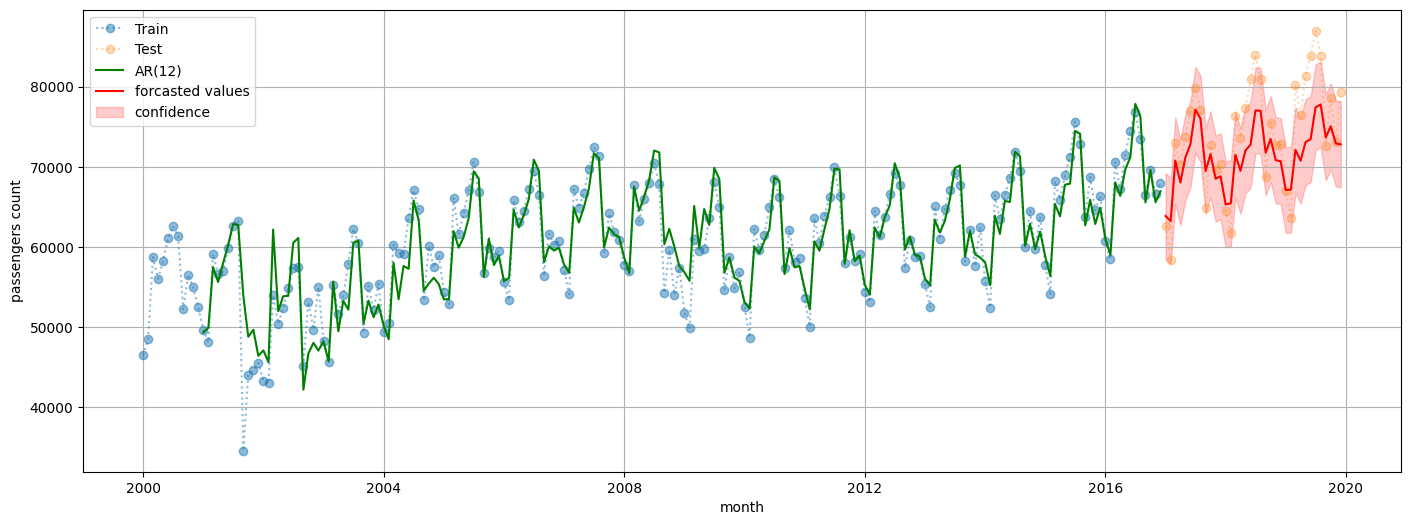

In [ ]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)

plt.plot(fit_val,'g-')

plt.plot(forcast_val,'r-')
# plt.fill_between(forcast_val.index, forcast_val - ME, forcast_val + ME, color='red', alpha=0.2)
plt.fill_between(df_test['month'], forcast_val - ME, forcast_val + ME, color='red', alpha=0.2)

plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test', 'AR(12)', 'forcasted values', 'confidence'])

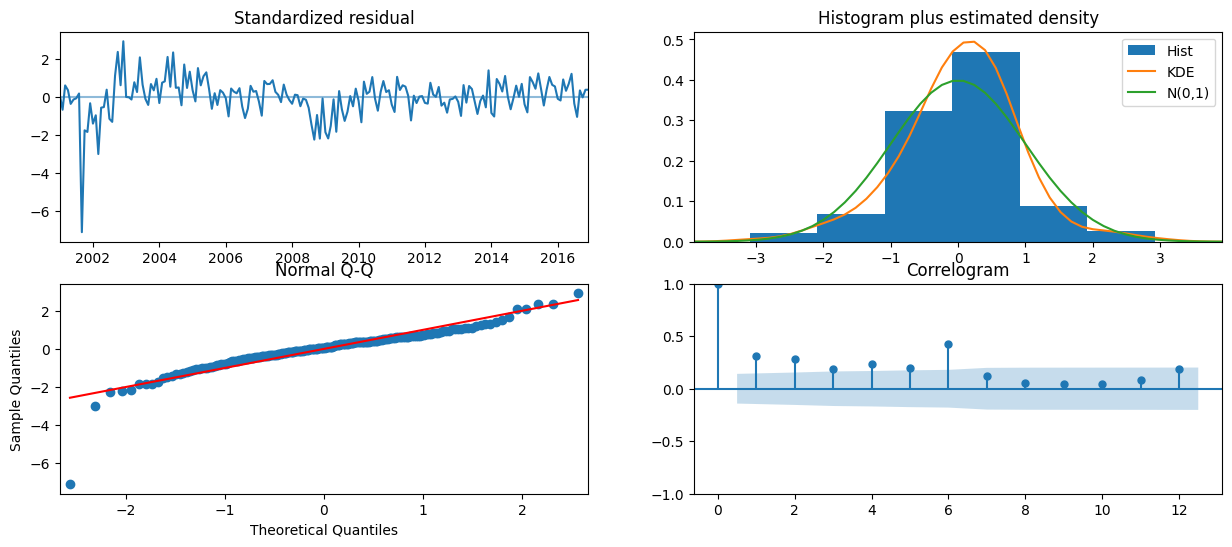

In [ ]:
# evaluation
model.plot_diagnostics(lags=12, figsize=(15, 6))
plt.show()


# This section is SMOTHING

In [7]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/US_AIR.CSV')
data['month']= pd.to_datetime(data['month'])

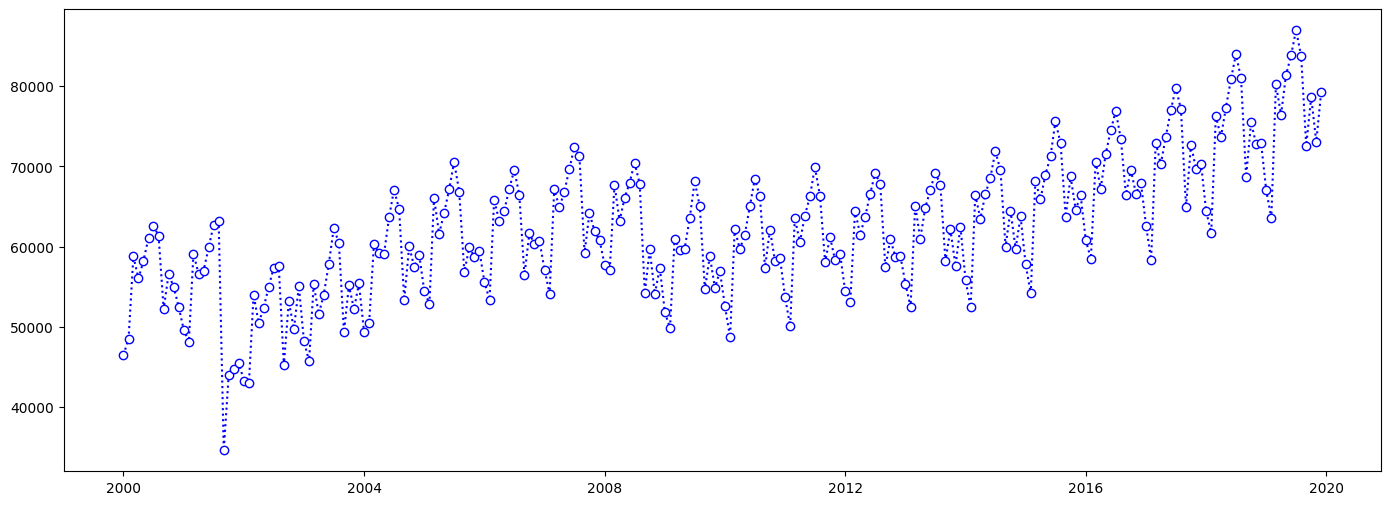

In [6]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.plot(data['month'],data['passengers'],'bo:', markerfacecolor='w')

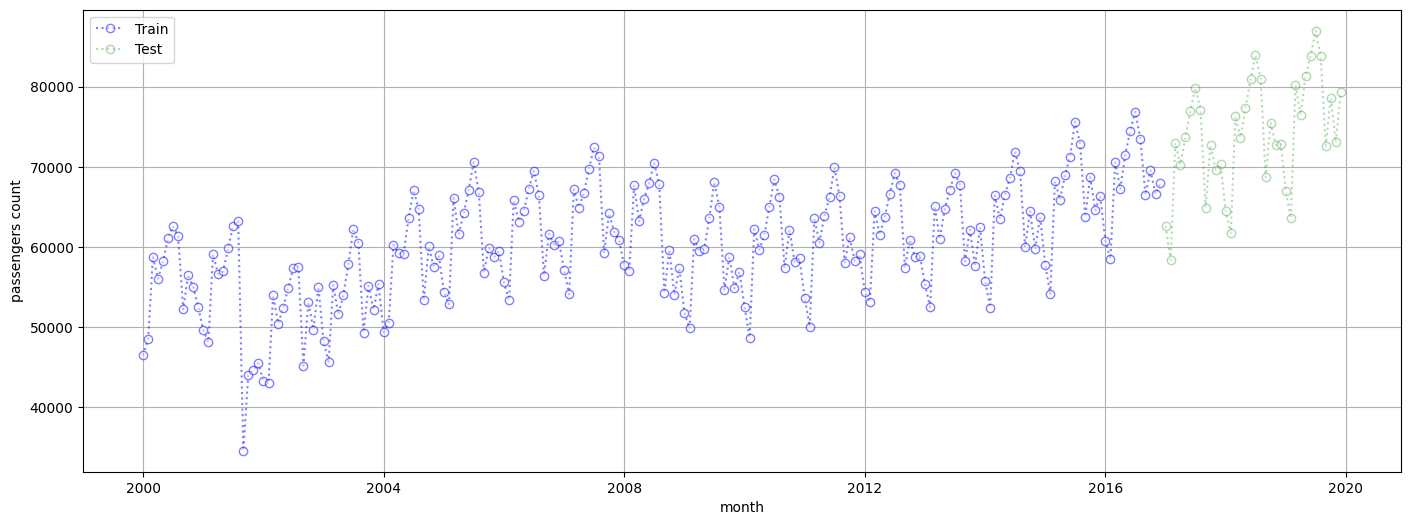

In [7]:
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
fig, ax = plt.subplots(figsize=(17, 6))
plt.plot(df_train['month'],df_train['passengers'],'bo:',alpha=0.5, markerfacecolor='w')
plt.plot(df_test['month'],df_test['passengers'],'go:',alpha=0.3, markerfacecolor='w')
plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test'])

In [20]:
# naive forcasting

df_train['fitted_values'] = df_train['passengers'].shift()
df_test['forcast'] = 67983

<ipython-input-20-6c1f86179459>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fitted_values'] = df_train['passengers'].shift()
<ipython-input-20-6c1f86179459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcast'] = 67983


In [28]:
# error
error = df_train['passengers'] - df_train['fitted_values']
ME = 1.96 * error.std()
ME

11469.660523364466

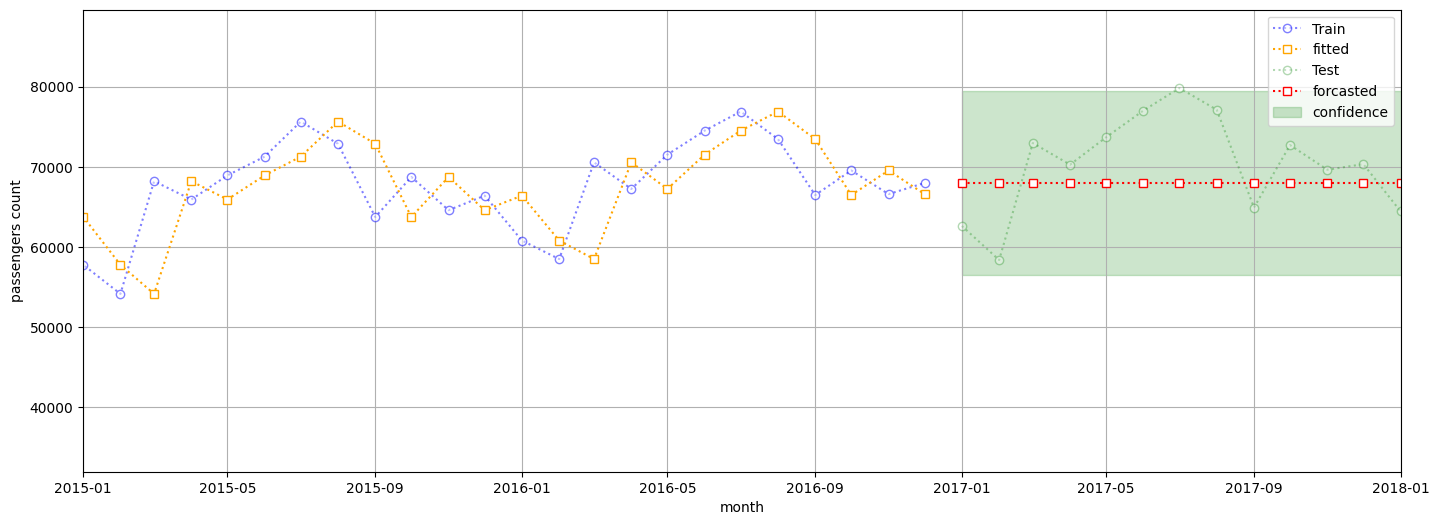

In [34]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'bo:',alpha=0.5, markerfacecolor='w')
plt.plot(df_train['month'],df_train['fitted_values'],'s:', color='orange', markerfacecolor='w')


plt.plot(df_test['month'],df_test['passengers'],'go:',alpha=0.3, markerfacecolor='w')
plt.plot(df_test['month'],df_test['forcast'],'s:', color='red', markerfacecolor='w')

plt.fill_between(df_test['month'], df_test['forcast'] - ME, df_test['forcast'] + ME, color='green', alpha=0.2)

# scalling
start = datetime.datetime.strptime('2015-01-01','%Y-%m-%d')
end = datetime.datetime.strptime('2018-01-01','%Y-%m-%d')
plt.axis(xmin=start, xmax=end)

plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','fitted','Test','forcasted','confidence'])

In [8]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/US_AIR.CSV')
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]

In [9]:
# simple moving average
df_train['fitted_3'] = df_train['passengers'].rolling(window=3).mean()
df_test['forcast'] = 68037.666667

<ipython-input-9-41cb65406735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fitted_3'] = df_train['passengers'].rolling(window=3).mean()
<ipython-input-9-41cb65406735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcast'] = 68037.666667


In [10]:
# error
error = df_train['passengers'] - df_train['fitted_3']
ME = 1.96 * error.std()
ME


7476.721987281759

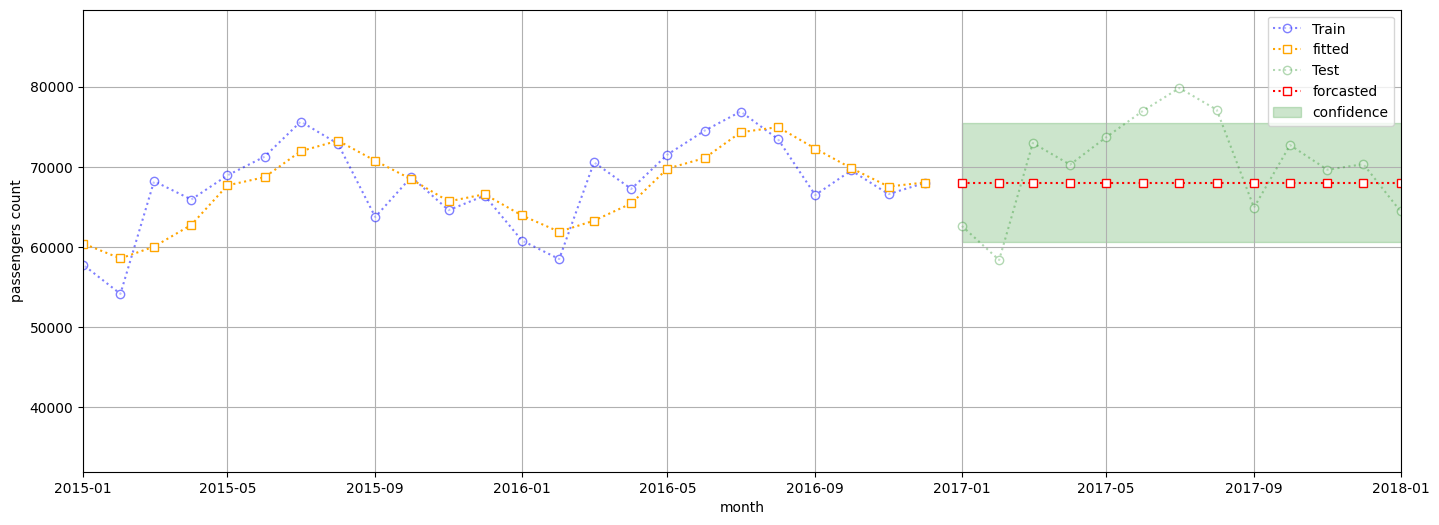

In [11]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'bo:',alpha=0.5, markerfacecolor='w')
plt.plot(df_train['month'],df_train['fitted_3'],'s:', color='orange', markerfacecolor='w')


plt.plot(df_test['month'],df_test['passengers'],'go:',alpha=0.3, markerfacecolor='w')
plt.plot(df_test['month'],df_test['forcast'],'s:', color='red', markerfacecolor='w')

plt.fill_between(df_test['month'], df_test['forcast'] - ME, df_test['forcast'] + ME, color='green', alpha=0.2)

# scalling
start = datetime.datetime.strptime('2015-01-01','%Y-%m-%d')
end = datetime.datetime.strptime('2018-01-01','%Y-%m-%d')
plt.axis(xmin=start, xmax=end)

plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','fitted','Test','forcasted','confidence'])

In [12]:
# weighted simple moving average
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]

In [18]:
def weighted_sma(x):
  weight = np.arange(1, len(x)+1, +1)
  num = np.sum(x*weight)
  den = np.sum(weight)
  return num/den

In [20]:
df_train['fitted_3'] = df_train['passengers'].rolling(window=3).apply(weighted_sma)
df_train['fitted_62'] = df_train['passengers'].rolling(window=62).apply(weighted_sma)

<ipython-input-20-b1c9cef8615a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fitted_3'] = df_train['passengers'].rolling(window=3).apply(weighted_sma)
<ipython-input-20-b1c9cef8615a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fitted_62'] = df_train['passengers'].rolling(window=62).apply(weighted_sma)


In [21]:
df_train.head()

,month,passengers,fitted_3,fitted_62
0,2000-01-01,46492,NaN,NaN
1,2000-02-01,48526,NaN,NaN
2,2000-03-01,58764,53306.000000,NaN
3,2000-04-01,56033,55692.166667,NaN
4,2000-05-01,58201,57572.166667,NaN


In [22]:
df_train.tail()

,month,passengers,fitted_3,fitted_62
199,2016-08-01,73450,74770.666667,65520.943164
200,2016-09-01,66477,70536.166667,65600.055300
201,2016-10-01,69539,69170.166667,65778.132104
202,2016-11-01,66591,67554.666667,65860.962622
203,2016-12-01,67983,67778.333333,65983.619560


In [23]:
df_test['forcast_3'] = 67778.333333
df_test['forcast_62'] = 65983.619560

<ipython-input-23-9669a13d9de0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcast_3'] = 67778.333333
<ipython-input-23-9669a13d9de0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcast_62'] = 65983.619560


In [24]:
# error
error = df_train['passengers'] - df_train['fitted_62']
ME = 1.96 * error.std()
ME

11103.718115732006

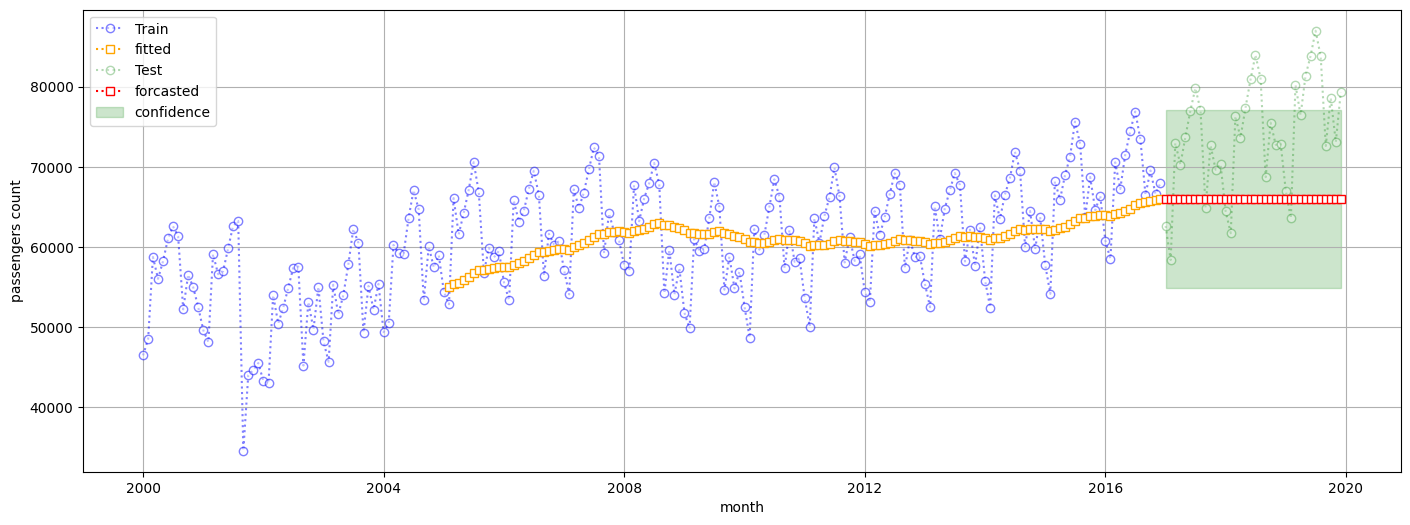

In [26]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'bo:',alpha=0.5, markerfacecolor='w')
plt.plot(df_train['month'],df_train['fitted_62'],'s:', color='orange', markerfacecolor='w')


plt.plot(df_test['month'],df_test['passengers'],'go:',alpha=0.3, markerfacecolor='w')
plt.plot(df_test['month'],df_test['forcast_62'],'s:', color='red', markerfacecolor='w')

plt.fill_between(df_test['month'], df_test['forcast_62'] - ME, df_test['forcast_62'] + ME, color='green', alpha=0.2)

# scalling
# start = datetime.datetime.strptime('2015-01-01','%Y-%m-%d')
# end = datetime.datetime.strptime('2018-01-01','%Y-%m-%d')
# plt.axis(xmin=start, xmax=end)

plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','fitted','Test','forcasted','confidence'])

In [29]:
# exponential moving average
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]

In [33]:
df_train['fitted_3'] = df_train['passengers'].ewm(min_periods=3, alpha=0.5).mean()
# change alpha and min_periods
# df_train['fitted_62'] = df_train['passengers'].ewm(span=62).mean()
df_test['forcast_3'] = 68104.352005

<ipython-input-33-0a56ad0d00f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fitted_3'] = df_train['passengers'].ewm(min_periods=3, alpha=0.5).mean()
<ipython-input-33-0a56ad0d00f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forcast_3'] = 68104.352005


In [34]:
# error
error = df_train['passengers'] - df_train['fitted_3']
ME = 1.96 * error.std()
ME

5418.761040074296

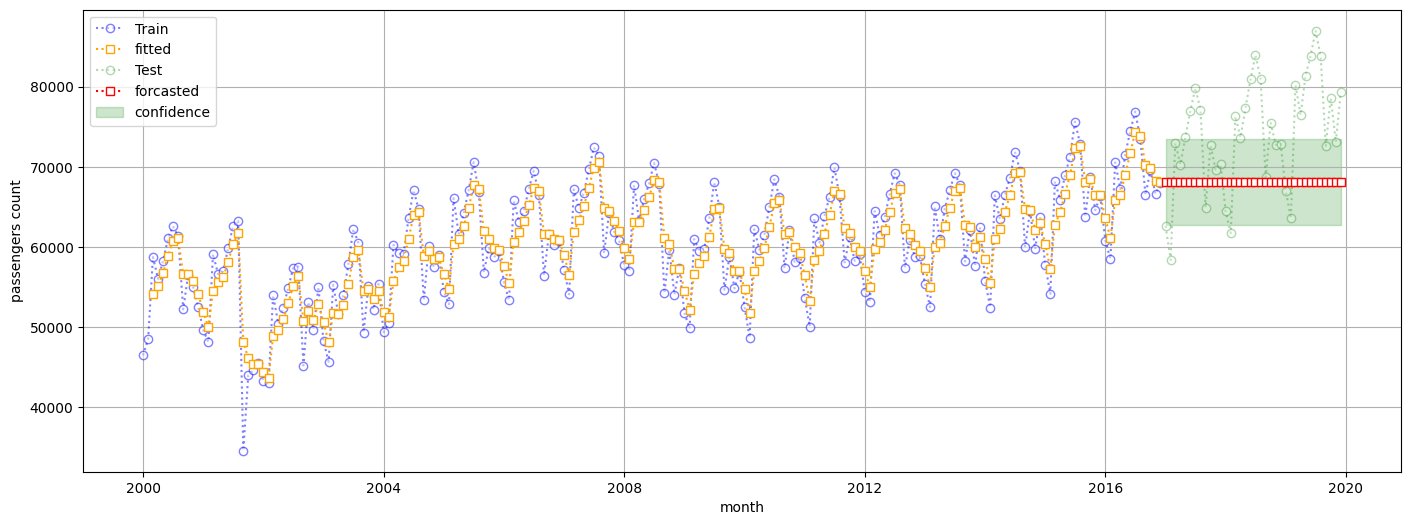

In [35]:
fig, ax = plt.subplots(figsize=(17, 6))

plt.plot(df_train['month'],df_train['passengers'],'bo:',alpha=0.5, markerfacecolor='w')
plt.plot(df_train['month'],df_train['fitted_3'],'s:', color='orange', markerfacecolor='w')


plt.plot(df_test['month'],df_test['passengers'],'go:',alpha=0.3, markerfacecolor='w')
plt.plot(df_test['month'],df_test['forcast_3'],'s:', color='red', markerfacecolor='w')

plt.fill_between(df_test['month'], df_test['forcast_3'] - ME, df_test['forcast_3'] + ME, color='green', alpha=0.2)

# scalling
# start = datetime.datetime.strptime('2015-01-01','%Y-%m-%d')
# end = datetime.datetime.strptime('2018-01-01','%Y-%m-%d')
# plt.axis(xmin=start, xmax=end)

plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','fitted','Test','forcasted','confidence'])

# This section is AUTOREGRESSIVE MOVING AVERAGE(ARMA)

In [64]:
!pip install statsmodels

In [7]:
# from statsmodels.tsa.arima.model import ARMA, ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIME SERIES/data/US_AIR.CSV')
data['month']= pd.to_datetime(data['month'])

In [9]:
df_train = data[data['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_test = data[data['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')]
df_train.set_index('month', inplace=True)
df_test.set_index('month', inplace=True)


In [10]:
df_train.tail()

,passengers
month,
2016-08-01,73450
2016-09-01,66477
2016-10-01,69539
2016-11-01,66591
2016-12-01,67983


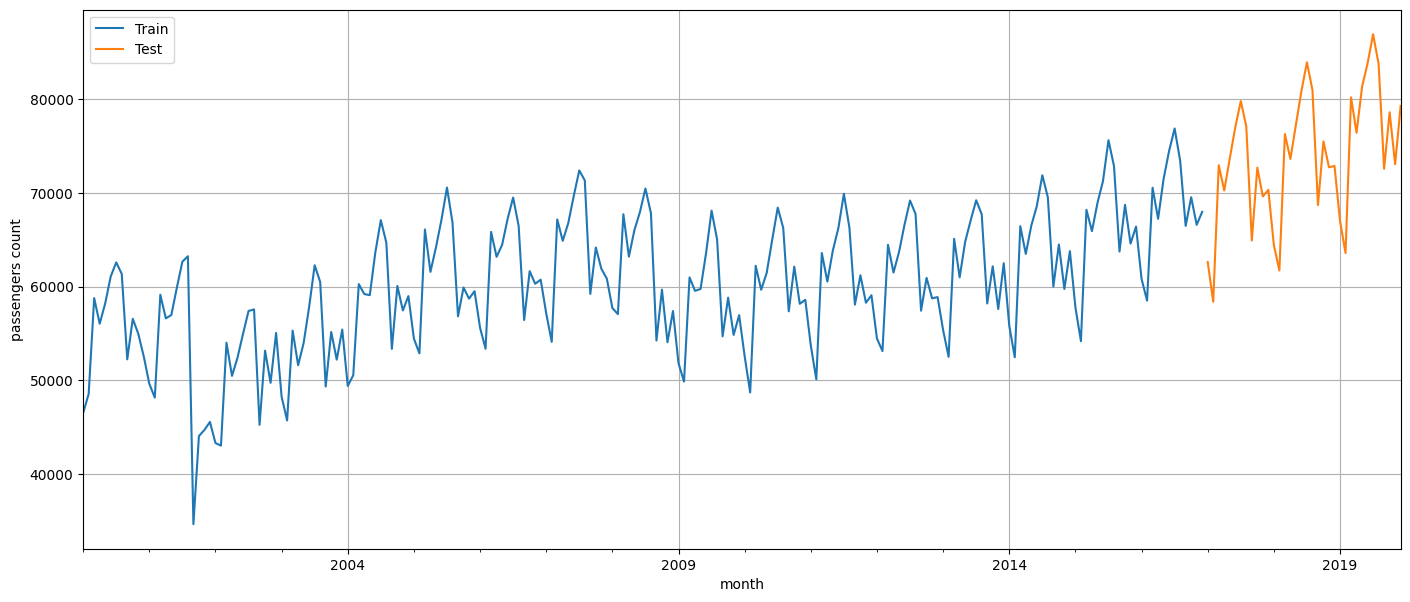

In [11]:
fig, ax = plt.subplots(figsize=(17, 7))
# sns.lineplot(x='month',y='passengers',data=df_train, ax=ax)
# sns.lineplot(x='month',y='passengers',data=df_test, ax=ax)
df_train.plot(kind='line', ax=ax )
df_test.plot(kind='line', ax=ax )
plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test'])

In [12]:
# ARMA model for stationary data
# therefore convert above to stationary data
from statsmodels.tsa.stattools import adfuller
adfuller(df_train)
# data is not stationary if p-value >= 0.025
# data is stationary if p-value < 0.025
# here 2 value is p-value

(-0.952912494194844,
 0.7700488660390642,
 13,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 3449.617955746232)

In [13]:
stationary_train_df = df_train.diff().dropna()

<Axes: xlabel='month'>

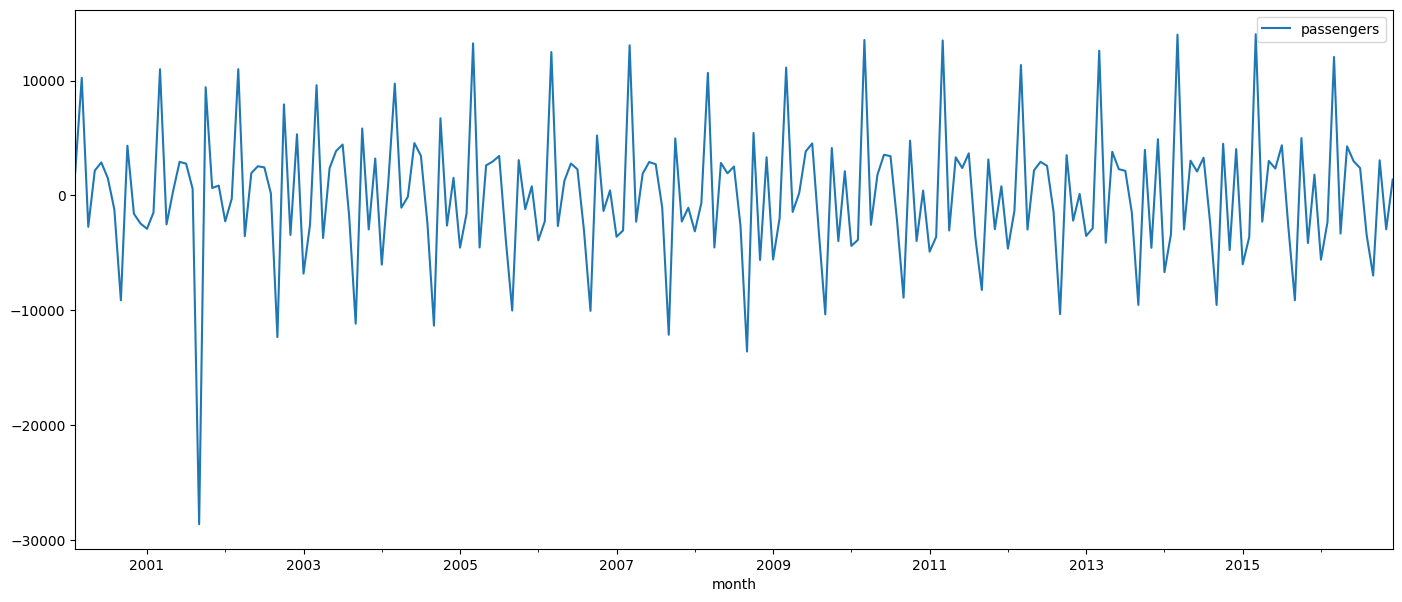

In [14]:
fig, ax = plt.subplots(figsize=(17, 7))
stationary_train_df.plot(kind='line',ax=ax)

In [15]:
adfuller(stationary_train_df)

(-3.7700038981223853,
 0.003229563894313896,
 12,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 3430.804868488187)

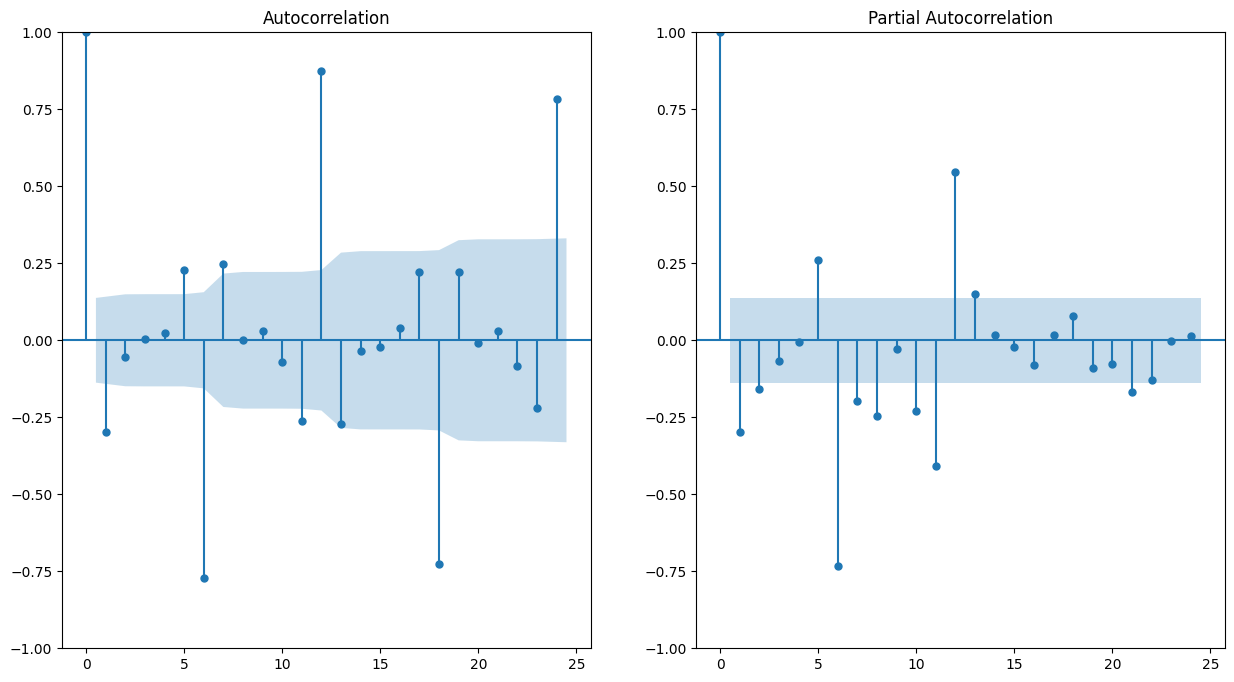

In [16]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
res1 = plot_acf(stationary_train_df['passengers'], ax=ax[0])
res2 = plot_pacf(stationary_train_df['passengers'], ax=ax[1])
# to find p and q

In [66]:
(p,q,r) = (6,0,6)
model = ARIMA(stationary_train_df, order=(p,q,r)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:

model.aic

3789.898490695001

In [68]:
fit_val = model.fittedvalues

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(stationary_train_df, fit_val)

6320800.736105667

<Axes: xlabel='month'>

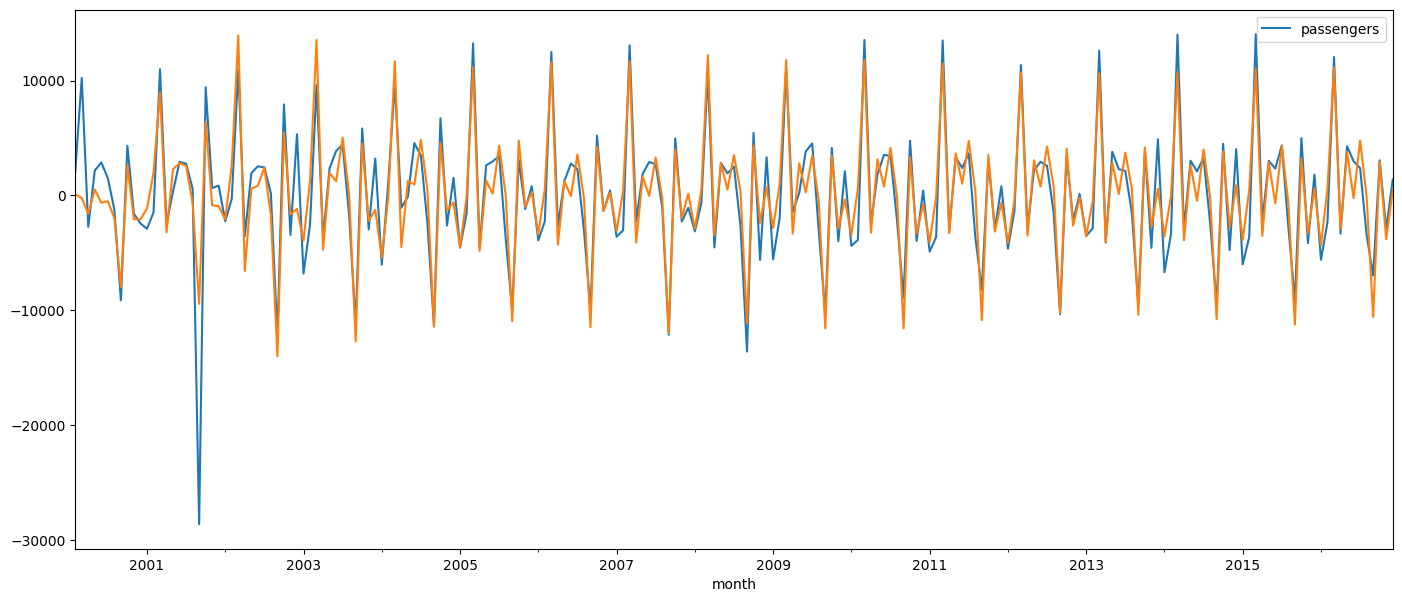

In [70]:
fig, ax = plt.subplots(figsize=(17, 7))
stationary_train_df.plot(kind='line',ax=ax)
fit_val.plot(kind='line',ax=ax)

In [71]:
start = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
end = datetime.datetime.strptime('2019-12-01','%Y-%m-%d')
pred_val = model.predict(start,end)
# pred_val

In [81]:
# to convert stationary to non stationary
init_val = 67983 #last value in train data
forcast = init_val + pred_val.cumsum()

-4326.960094959377

In [87]:
# conf_interval[1]

-327.80770479843943

In [82]:
# confidednce interval
conf_interval = model.forecast(steps=len(forcast))
lower_limit = forcast + conf_interval[0]
upper_limit = forcast + conf_interval[1]

In [83]:
df_test.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

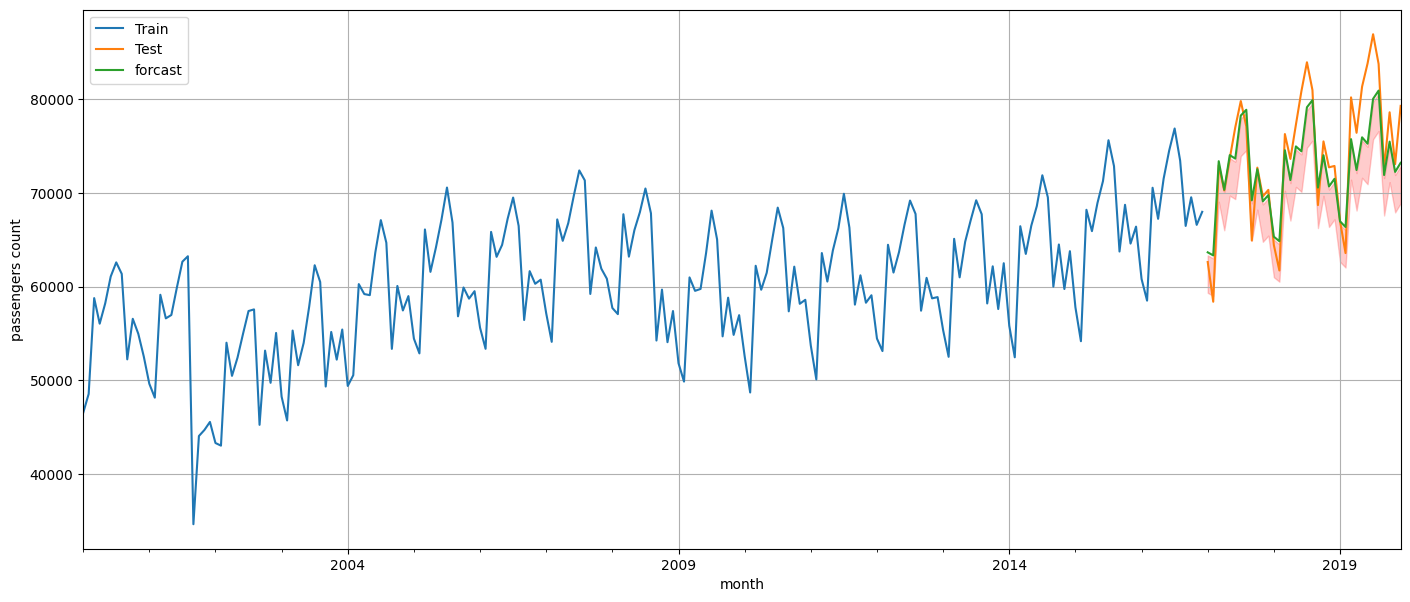

In [84]:
fig, ax = plt.subplots(figsize=(17, 7))
# sns.lineplot(x='month',y='passengers',data=df_train, ax=ax)
# sns.lineplot(x='month',y='passengers',data=df_test, ax=ax)
df_train.plot(kind='line', ax=ax )
df_test.plot(kind='line', ax=ax )
forcast.plot(kind='line', ax=ax )
plt.fill_between(df_test.index, lower_limit, upper_limit, color='red', alpha=0.2)
plt.ylabel('passengers count')
plt.xlabel('month')
plt.grid()
plt.legend(['Train','Test', 'forcast'])